## Dataset Overview

- Total entries: 8000
- Features (columns): 30 (27 input features, 1 target) 

## Objective:
To classify land cover types using NDVI time-series data into one of six classes:

- Water
- Impervious
- Farm
- Forest
- Grass
- Orchard

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/summer-analytics-mid-hackathon/hacktest.csv
/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv


In [3]:
# Importing the libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
df = pd.read_csv('/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv')
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,1,2,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,3,4,water,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,...,-1025.88,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,4,5,water,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,...,-1813.95,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,7,8,water,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,...,1535.00,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140


In [5]:
df.shape

(8000, 30)

In [6]:
df.columns

Index(['Unnamed: 0', 'ID', 'class', '20150720_N', '20150602_N', '20150517_N',
       '20150501_N', '20150415_N', '20150330_N', '20150314_N', '20150226_N',
       '20150210_N', '20150125_N', '20150109_N', '20141117_N', '20141101_N',
       '20141016_N', '20140930_N', '20140813_N', '20140626_N', '20140610_N',
       '20140525_N', '20140509_N', '20140423_N', '20140407_N', '20140322_N',
       '20140218_N', '20140202_N', '20140117_N', '20140101_N'],
      dtype='object')

In [7]:
df.drop(columns=['Unnamed: 0', 'ID'], inplace=True)

In [8]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,NaN,-1325.64,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,-1670.590,-1408.64,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,water,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,729.790,-3162.14,...,-1025.88,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,water,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,683.254,-2829.40,...,-1813.95,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,water,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,NaN,1242.87,...,1535.00,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140


In [9]:
df.isnull().sum()

class            0
20150720_N     560
20150602_N    1200
20150517_N     800
20150501_N     960
20150415_N     480
20150330_N    1120
20150314_N     720
20150226_N    1360
20150210_N     640
20150125_N    1040
20150109_N     880
20141117_N    1280
20141101_N     400
20141016_N    1440
20140930_N     800
20140813_N     560
20140626_N    1600
20140610_N     480
20140525_N     720
20140509_N     880
20140423_N    1760
20140407_N     640
20140322_N    1120
20140218_N    1440
20140202_N     560
20140117_N    1200
20140101_N     400
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
## Dealing with missing values
# 1. Interpolation
ndvi_cols = [col for col in df.columns if '_N' in col]

df[ndvi_cols] = df[ndvi_cols].interpolate(method='linear', axis=1)

In [12]:
df.isnull().sum()

class           0
20150720_N    560
20150602_N     71
20150517_N      6
20150501_N      0
20150415_N      0
20150330_N      0
20150314_N      0
20150226_N      0
20150210_N      0
20150125_N      0
20150109_N      0
20141117_N      0
20141101_N      0
20141016_N      0
20140930_N      0
20140813_N      0
20140626_N      0
20140610_N      0
20140525_N      0
20140509_N      0
20140423_N      0
20140407_N      0
20140322_N      0
20140218_N      0
20140202_N      0
20140117_N      0
20140101_N      0
dtype: int64

In [13]:
## Checking class rows will be affected by dropping remaining null values
df['missing_count'] = df[ndvi_cols].isna().sum(axis=1)
print(df.groupby('class')['missing_count'].apply(lambda x: (x > 0).sum()))

class
farm           55
forest        431
grass          20
impervious     49
orchard         1
water           4
Name: missing_count, dtype: int64


In [14]:
df.drop(columns=['missing_count'], inplace=True)
## 2. Dropping remaining null values --> Can try ffill or bfill as well.. 
df = df.dropna()

In [15]:
df.isnull().sum()

class         0
20150720_N    0
20150602_N    0
20150517_N    0
20150501_N    0
20150415_N    0
20150330_N    0
20150314_N    0
20150226_N    0
20150210_N    0
20150125_N    0
20150109_N    0
20141117_N    0
20141101_N    0
20141016_N    0
20140930_N    0
20140813_N    0
20140626_N    0
20140610_N    0
20140525_N    0
20140509_N    0
20140423_N    0
20140407_N    0
20140322_N    0
20140218_N    0
20140202_N    0
20140117_N    0
20140101_N    0
dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='class', ylabel='Count'>

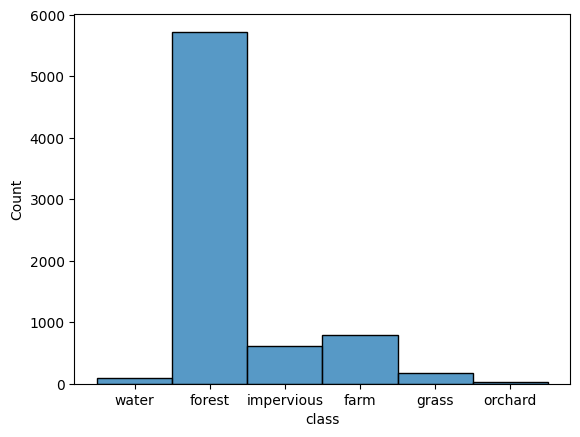

In [16]:
sns.histplot(data=df, x=df['class'])

<Axes: >

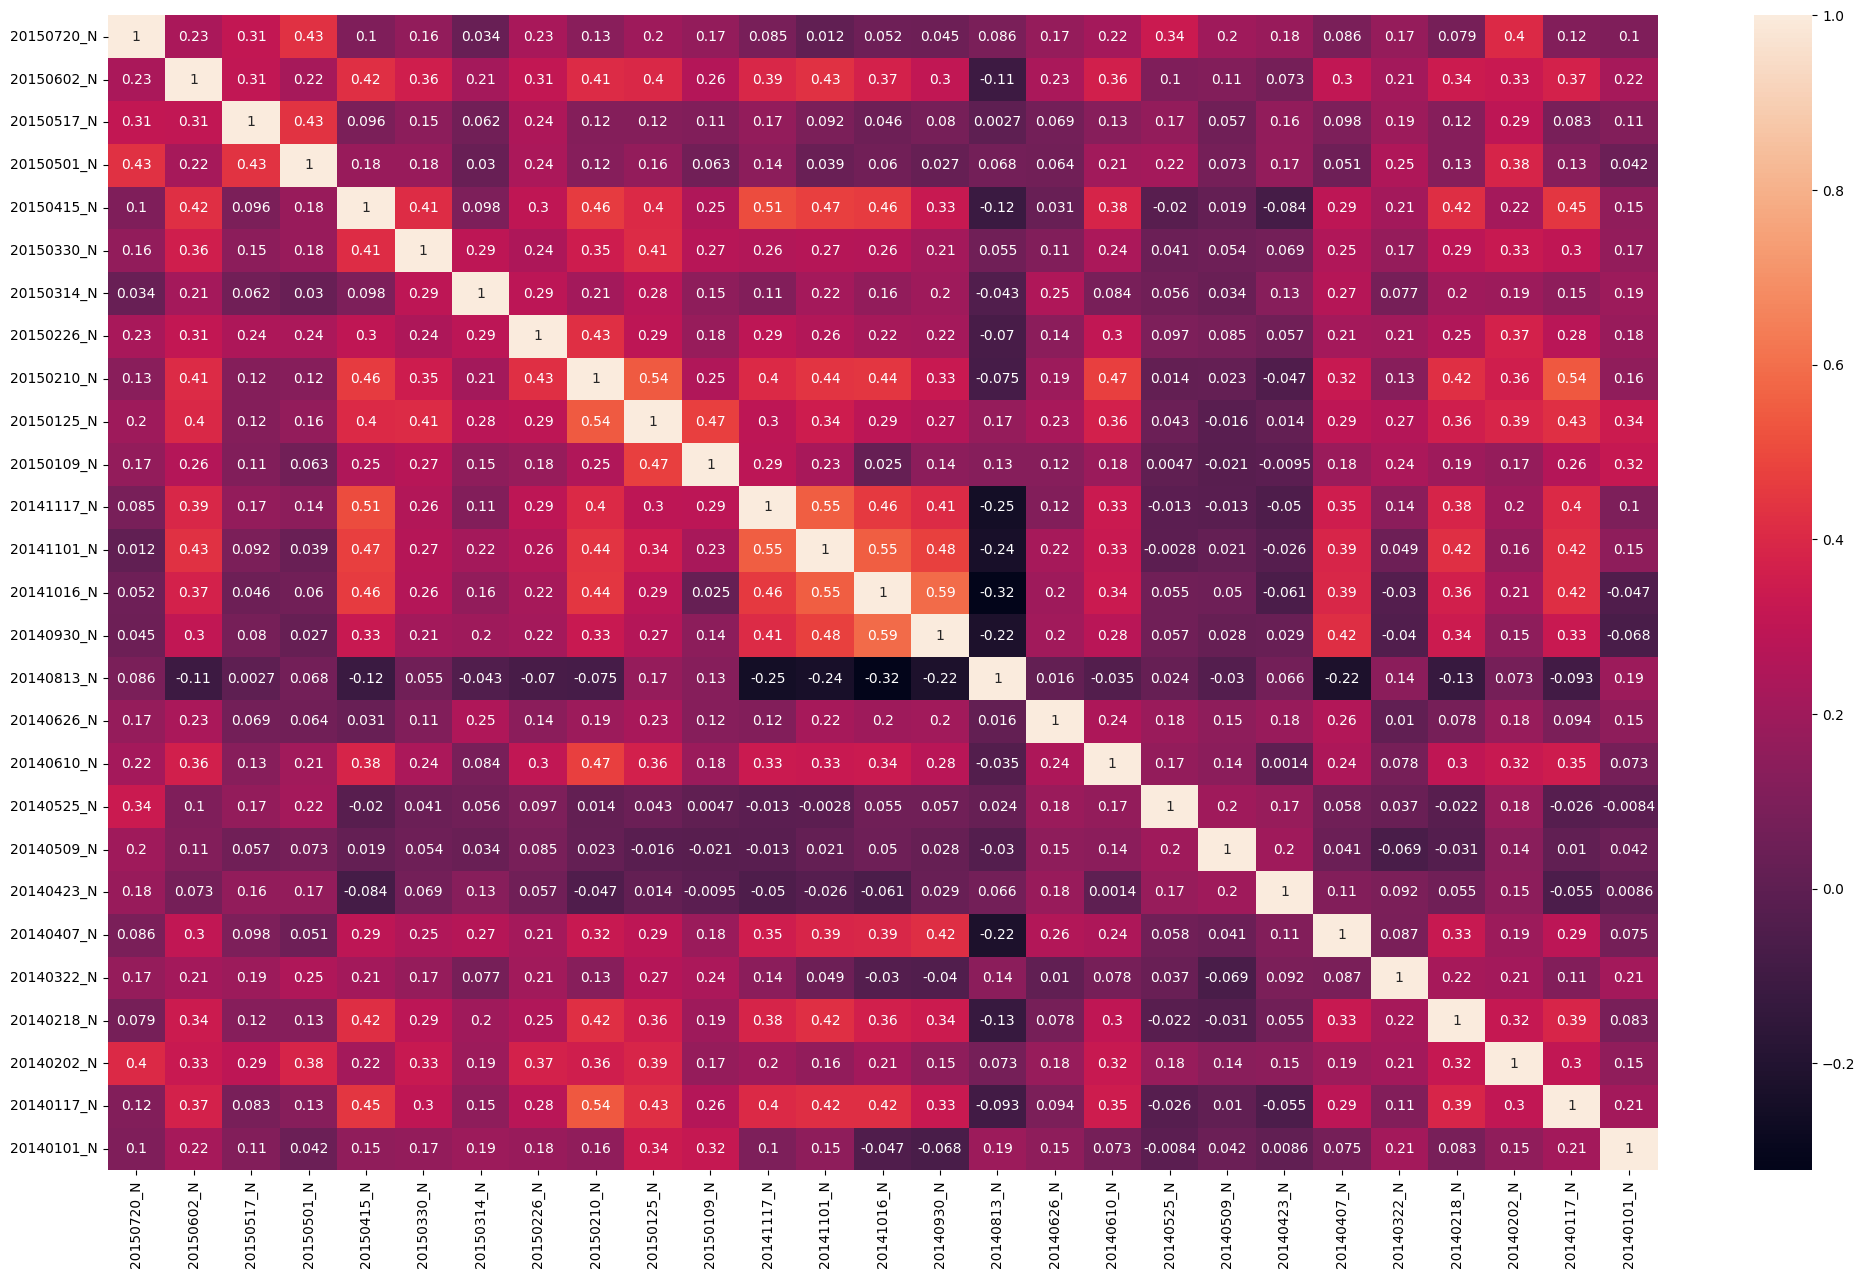

In [17]:
plt.figure(figsize=[25,15])
num_df = df.select_dtypes(include='number')
sns.heatmap(num_df.corr(), annot=True)

In [18]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['class'] = encoder.fit_transform(df['class'])

In [19]:
# Splitting the data into independent and dependent variable
X = df.drop(columns=['class'])
y = df['class']

# Splitting the data into training and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42,stratify=y)

In [20]:
X_train.shape, X_test.shape

((5952, 27), (1488, 27))

In [21]:
## Standardization
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

X_train

array([[ 0.67784291,  0.32816754, -0.0761919 , ..., -1.0591769 ,
         0.85656898,  1.63683639],
       [ 0.81944661,  1.23713191, -1.14841087, ..., -0.28697415,
         0.14541095, -0.62559822],
       [ 0.64491601, -1.54843516,  1.01654559, ...,  0.17249332,
         0.24876976, -0.82077422],
       ...,
       [ 0.57899173,  0.64719331, -0.27623412, ...,  0.27010183,
         0.41895551,  0.55553602],
       [-1.81326404, -1.43797702, -0.19904796, ..., -2.66222583,
        -1.05124363, -0.91581629],
       [ 0.41377125,  0.92114133,  1.0353498 , ...,  0.6490831 ,
        -0.60822109, -0.34792356]])

In [22]:
# Compute class weights
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)

weights_dict = dict(enumerate(class_weights))
weights_dict

{0: 1.5771065182829889,
 1: 0.21649934526407683,
 2: 7.035460992907802,
 3: 2.0,
 4: 43.130434782608695,
 5: 12.246913580246913}

In [23]:
## Model Training 
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(multi_class='multinomial', class_weight='balanced', max_iter=200)
logistic.fit(X_train,y_train)
y_pred = logistic.predict(X_test)


In [24]:
from sklearn.metrics import classification_report, f1_score, accuracy_score

print(accuracy_score(y_test,y_pred))
print(classification_report(
    y_test,y_pred,
    labels=list(range(len(encoder.classes_))),
    target_names=encoder.classes_
))

0.6344086021505376
              precision    recall  f1-score   support

        farm       0.44      0.64      0.52       157
      forest       0.97      0.62      0.75      1146
       grass       0.14      0.71      0.24        35
  impervious       0.72      0.77      0.74       124
     orchard       0.02      0.67      0.05         6
       water       0.22      0.55      0.31        20

    accuracy                           0.63      1488
   macro avg       0.42      0.66      0.44      1488
weighted avg       0.86      0.63      0.71      1488



In [25]:
## Hyper parameter Tuning
logistic_params = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['lbfgs', 'sag', 'saga', 'newton-cg'],
    'max_iter': [100, 200, 400, 600, 1000],
}


In [26]:
from sklearn.model_selection import RandomizedSearchCV

random = RandomizedSearchCV(estimator=logistic, param_distributions=logistic_params, cv=5, n_jobs=-1)
random.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
35 fits failed out of 

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(class_weight='balanced',
                                                max_iter=200,
                                                multi_class='multinomial'),
                   n_jobs=-1,
                   param_distributions={'max_iter': [100, 200, 400, 600, 1000],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['lbfgs', 'sag', 'saga',
                                                   'newton-cg']})

In [27]:
random.best_params_

{'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 400}

In [28]:
model = LogisticRegression(solver= 'lbfgs', penalty= 'l2', max_iter=100)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
# Classification report with all original class labels
print(accuracy_score(y_test,y_pred))
print(classification_report(
    y_test,
    y_pred,
    labels=list(range(len(encoder.classes_))),
    target_names=encoder.classes_
))

0.8548387096774194
              precision    recall  f1-score   support

        farm       0.62      0.42      0.50       157
      forest       0.88      0.96      0.92      1146
       grass       0.25      0.09      0.13        35
  impervious       0.85      0.75      0.79       124
     orchard       1.00      0.17      0.29         6
       water       1.00      0.50      0.67        20

    accuracy                           0.85      1488
   macro avg       0.77      0.48      0.55      1488
weighted avg       0.84      0.85      0.84      1488



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
test_data = pd.read_csv('/kaggle/input/summer-analytics-mid-hackathon/hacktest.csv')
test_data.shape

(2845, 29)

In [34]:
test_data.columns

Index(['Unnamed: 0', 'ID', '20150720_N', '20150602_N', '20150517_N',
       '20150501_N', '20150415_N', '20150330_N', '20150314_N', '20150226_N',
       '20150210_N', '20150125_N', '20150109_N', '20141117_N', '20141101_N',
       '20141016_N', '20140930_N', '20140813_N', '20140626_N', '20140610_N',
       '20140525_N', '20140509_N', '20140423_N', '20140407_N', '20140322_N',
       '20140218_N', '20140202_N', '20140117_N', '20140101_N'],
      dtype='object')

In [35]:
ID = test_data['ID']
test_data.drop(columns=['Unnamed: 0', 'ID'], inplace=True)

In [36]:
# Standardization 
scaler = StandardScaler()
test_data = scaler.fit_transform(test_data)

In [37]:
y_pred1=logistic.predict(test_data)
y_pred1

array([4, 4, 4, ..., 5, 5, 3])

In [38]:
y_decoded = encoder.inverse_transform(y_pred1)
y_decoded

array(['orchard', 'orchard', 'orchard', ..., 'water', 'water',
       'impervious'], dtype=object)

In [39]:
result = pd.DataFrame({
    'ID': ID,
    'class': y_decoded
})

In [40]:
result

,ID,class
0,1,orchard
1,2,orchard
2,3,orchard
3,4,orchard
4,5,orchard
...,...,...
2840,2841,water
2841,2842,water
2842,2843,water
2843,2844,water


In [41]:
result.to_csv("submission.csv", index=False)